In [17]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("cleanData.csv")

In [27]:
# Total Average price vs. 1-(white owner occupied housing / total owner occupied housing)
relevantdata2 = pd.DataFrame()

relevantdata2["5 persons"] = data["Occupied housing units 5 persons in unit"]
relevantdata2["6 persons"] = data["Occupied housing units 6 persons in unit"]
relevantdata2["7 persons"] = data["Occupied housing units 7 persons in unit"]
relevantdata2["8+ persons"] = data["Occupied housing units 8 persons or more in unit"]
relevantdata2["total persons"] = data["Persons in total occupied housing units"]
relevantdata2["Total renter occupied housing units"] = data["Total renter occupied housing units (includes White, Black and other races)"]
relevantdata2["White renter occupied housing units"] = data["White renter occupied housing units head of household"]

#relevantdata2["Total renter occupied housing units average monthly contract rent"] = relevantdata2["Total renter occupied housing units average monthly contract rent"].str.replace("$","")
#relevantdata2["Total renter occupied housing units average monthly contract rent"] = relevantdata2["Total renter occupied housing units average monthly contract rent"].replace("0.00",np.nan)

for col in relevantdata2:
    relevantdata2[col] = relevantdata2[col].str.replace("$","")
    relevantdata2[col] = relevantdata2[col].str.replace(",","")
    relevantdata2[col] = relevantdata2[col].replace("...", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" ... ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" -   ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace("", np.nan)
    relevantdata2 = relevantdata2.dropna()
    relevantdata2[col] = relevantdata2[col].astype(str).astype(float)
    
relevantdata2["Percent of non-white renter occupied housing units"] = 1 - (relevantdata2["White renter occupied housing units"] / relevantdata2["Total renter occupied housing units"])
relevantdata2["5+ persons"] = (relevantdata2["5 persons"] + relevantdata2["6 persons"] + relevantdata2["7 persons"] + relevantdata2["8+ persons"]) / relevantdata2["Total renter occupied housing units"]

for col in relevantdata2:
    relevantdata2[col] = relevantdata2[col].replace("$","")
    relevantdata2[col] = relevantdata2[col].replace(",","")
    relevantdata2[col] = relevantdata2[col].replace("...", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" ... ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace(" -   ", np.nan)
    relevantdata2[col] = relevantdata2[col].replace("", np.nan)
    relevantdata2 = relevantdata2.dropna()
    relevantdata2[col] = relevantdata2[col].astype(str).astype(float)
    
relevantdata2

,5 persons,6 persons,7 persons,8+ persons,total persons,Total renter occupied housing units,White renter occupied housing units,Percent of non-white renter occupied housing units,5+ persons
0,23.0,17.0,6.0,9.0,901.0,47.0,46.0,0.021277,1.170213
1,17.0,11.0,6.0,9.0,683.0,23.0,23.0,0.000000,1.869565
2,22.0,11.0,7.0,1.0,532.0,10.0,10.0,0.000000,4.100000
3,10.0,6.0,2.0,3.0,421.0,30.0,29.0,0.033333,0.700000
4,9.0,3.0,1.0,0.0,489.0,24.0,22.0,0.083333,0.541667
...,...,...,...,...,...,...,...,...,...
1258,2.0,4.0,0.0,2.0,108.0,8.0,8.0,0.000000,1.000000
1259,6.0,5.0,4.0,2.0,271.0,17.0,16.0,0.058824,1.000000
1260,9.0,4.0,0.0,0.0,259.0,24.0,24.0,0.000000,0.541667
1261,17.0,6.0,2.0,3.0,416.0,33.0,32.0,0.030303,0.848485


In [30]:
skim_milk = relevantdata2.loc[relevantdata2["5+ persons"] > 0]
skim_milk

,5 persons,6 persons,7 persons,8+ persons,total persons,Total renter occupied housing units,White renter occupied housing units,Percent of non-white renter occupied housing units,5+ persons
0,23.0,17.0,6.0,9.0,901.0,47.0,46.0,0.021277,1.170213
1,17.0,11.0,6.0,9.0,683.0,23.0,23.0,0.000000,1.869565
2,22.0,11.0,7.0,1.0,532.0,10.0,10.0,0.000000,4.100000
3,10.0,6.0,2.0,3.0,421.0,30.0,29.0,0.033333,0.700000
4,9.0,3.0,1.0,0.0,489.0,24.0,22.0,0.083333,0.541667
...,...,...,...,...,...,...,...,...,...
1258,2.0,4.0,0.0,2.0,108.0,8.0,8.0,0.000000,1.000000
1259,6.0,5.0,4.0,2.0,271.0,17.0,16.0,0.058824,1.000000
1260,9.0,4.0,0.0,0.0,259.0,24.0,24.0,0.000000,0.541667
1261,17.0,6.0,2.0,3.0,416.0,33.0,32.0,0.030303,0.848485


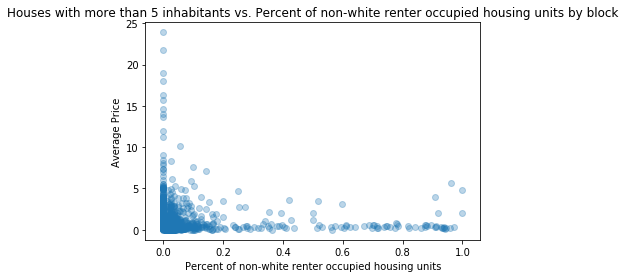

In [31]:
plt.scatter(skim_milk["Percent of non-white renter occupied housing units"], skim_milk["5+ persons"], alpha=0.3)
plt.title('Houses with more than 5 inhabitants vs. Percent of non-white renter occupied housing units by block')
plt.xlabel('Percent of non-white renter occupied housing units')
plt.ylabel('Average Price')
plt.show()

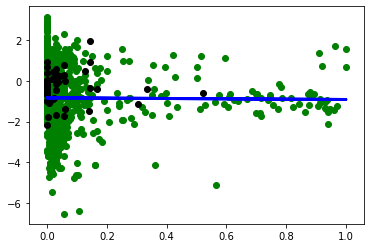

Coefficients: 
 [-0.08334386]
Mean squared error: 0.92
Coefficient of determination: -0.48
Coefficient of determination: 0.00


In [33]:
non_white = pd.DataFrame()

non_white["nonwhite"] = skim_milk["Percent of non-white renter occupied housing units"]
non_white["avcost"] = skim_milk["5+ persons"]

non_white

#Convert to numpy array

X = non_white["nonwhite"].values
X = X.reshape(-1, 1)

Y = np.log(non_white["avcost"].values)

# Split the data into training/testing sets
X_train = X[:-50]
X_test = X[-50:]

# Split the targets into training/testing sets
Y_train = Y[:-50]
Y_test = Y[-50:]

#X_train

regr = linear_model.LinearRegression()



# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

train_pred = regr.predict(X_train)
# Plot outputs
plt.scatter(X_train, Y_train, color = "green")
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_train, train_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_train, train_pred))